In [93]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')


In [137]:
df = pd.read_csv('Output_Data\EDA_data_subset.csv')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 100000 non-null  int64  
 1   user_id               100000 non-null  int64  
 2   age                   100000 non-null  int64  
 3   gender                100000 non-null  int64  
 4   residence             100000 non-null  int64  
 5   city                  100000 non-null  int64  
 6   city_rank             100000 non-null  int64  
 7   series_dev            100000 non-null  int64  
 8   series_group          100000 non-null  int64  
 9   emui_dev              100000 non-null  int64  
 10  device_name           100000 non-null  int64  
 11  device_size           100000 non-null  int64  
 12  net_type              100000 non-null  int64  
 13  task_id               100000 non-null  int64  
 14  adv_id                100000 non-null  int64  
 15  c

# corr

In [139]:
corr = df.corr()
corr

,label,user_id,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,...,adv_prim_id,inter_type_cd,slot_id,spread_app_id,hispace_app_tags,app_second_class,app_score,u_refreshTimes,u_feedLifeCycle,pt_d_hour
label,1.000000,-0.001526,-0.004870,-0.001302,0.003022,0.006336,-0.004949,-0.002948,0.014715,0.004728,...,-0.018347,0.000023,0.033085,0.007055,0.008785,0.003577,0.007720,-0.097762,-0.085149,-0.001592
user_id,-0.001526,1.000000,-0.016845,0.012630,-0.010459,0.004814,0.005189,0.005871,-0.007233,-0.012793,...,-0.002421,-0.006357,-0.002384,-0.001714,-0.005630,0.005779,-0.003618,-0.011595,-0.006657,-0.001042
age,-0.004870,-0.016845,1.000000,-0.039406,0.008769,-0.001853,-0.012782,0.105144,-0.103859,-0.010958,...,-0.008002,-0.031554,0.013053,-0.027933,-0.034473,0.040747,-0.060339,0.004307,0.035293,0.000755
gender,-0.001302,0.012630,-0.039406,1.000000,0.230222,0.156406,-0.079513,0.075340,-0.408068,-0.449036,...,0.005272,-0.011041,-0.014178,0.006544,-0.008170,0.008566,-0.013939,0.045595,0.009760,0.004886
residence,0.003022,-0.010459,0.008769,0.230222,1.000000,0.046457,-0.101022,0.031874,-0.125990,-0.136329,...,-0.003172,-0.004839,0.004091,-0.000996,-0.004528,0.006575,-0.009767,0.007609,-0.000146,-0.001702
city,0.006336,0.004814,-0.001853,0.156406,0.046457,1.000000,-0.115777,0.006448,-0.067043,-0.088410,...,0.005170,0.004187,-0.004409,-0.006229,0.000398,0.007199,-0.005123,0.010500,0.005966,0.004200
city_rank,-0.004949,0.005189,-0.012782,-0.079513,-0.101022,-0.115777,1.000000,0.019215,-0.025946,0.043473,...,-0.002344,0.011233,-0.001505,0.010878,-0.000256,-0.006825,-0.009347,0.048124,0.019784,0.011303
series_dev,-0.002948,0.005871,0.105144,0.075340,0.031874,0.006448,0.019215,1.000000,-0.381880,-0.207974,...,0.005122,-0.026825,-0.003885,-0.023405,-0.014832,0.029654,-0.042097,0.002864,0.003599,-0.000572
series_group,0.014715,-0.007233,-0.103859,-0.408068,-0.125990,-0.067043,-0.025946,-0.381880,1.000000,0.393711,...,-0.004673,0.039784,0.027610,0.023303,0.038307,-0.046231,0.084718,-0.113065,-0.055480,-0.014135
emui_dev,0.004728,-0.012793,-0.010958,-0.449036,-0.136329,-0.088410,0.043473,-0.207974,0.393711,1.000000,...,0.010069,-0.009025,-0.005324,-0.016861,-0.005143,0.002754,0.003265,-0.004654,-0.008339,-0.000860


In [140]:
corr.label.shape

(26,)

In [141]:
corr.label

label               1.000000
user_id            -0.001526
age                -0.004870
gender             -0.001302
residence           0.003022
city                0.006336
city_rank          -0.004949
series_dev         -0.002948
series_group        0.014715
emui_dev            0.004728
device_name         0.000521
device_size        -0.001627
net_type            0.006896
task_id             0.001199
adv_id             -0.002247
creat_type_cd      -0.030272
adv_prim_id        -0.018347
inter_type_cd       0.000023
slot_id             0.033085
spread_app_id       0.007055
hispace_app_tags    0.008785
app_second_class    0.003577
app_score           0.007720
u_refreshTimes     -0.097762
u_feedLifeCycle    -0.085149
pt_d_hour          -0.001592
Name: label, dtype: float64

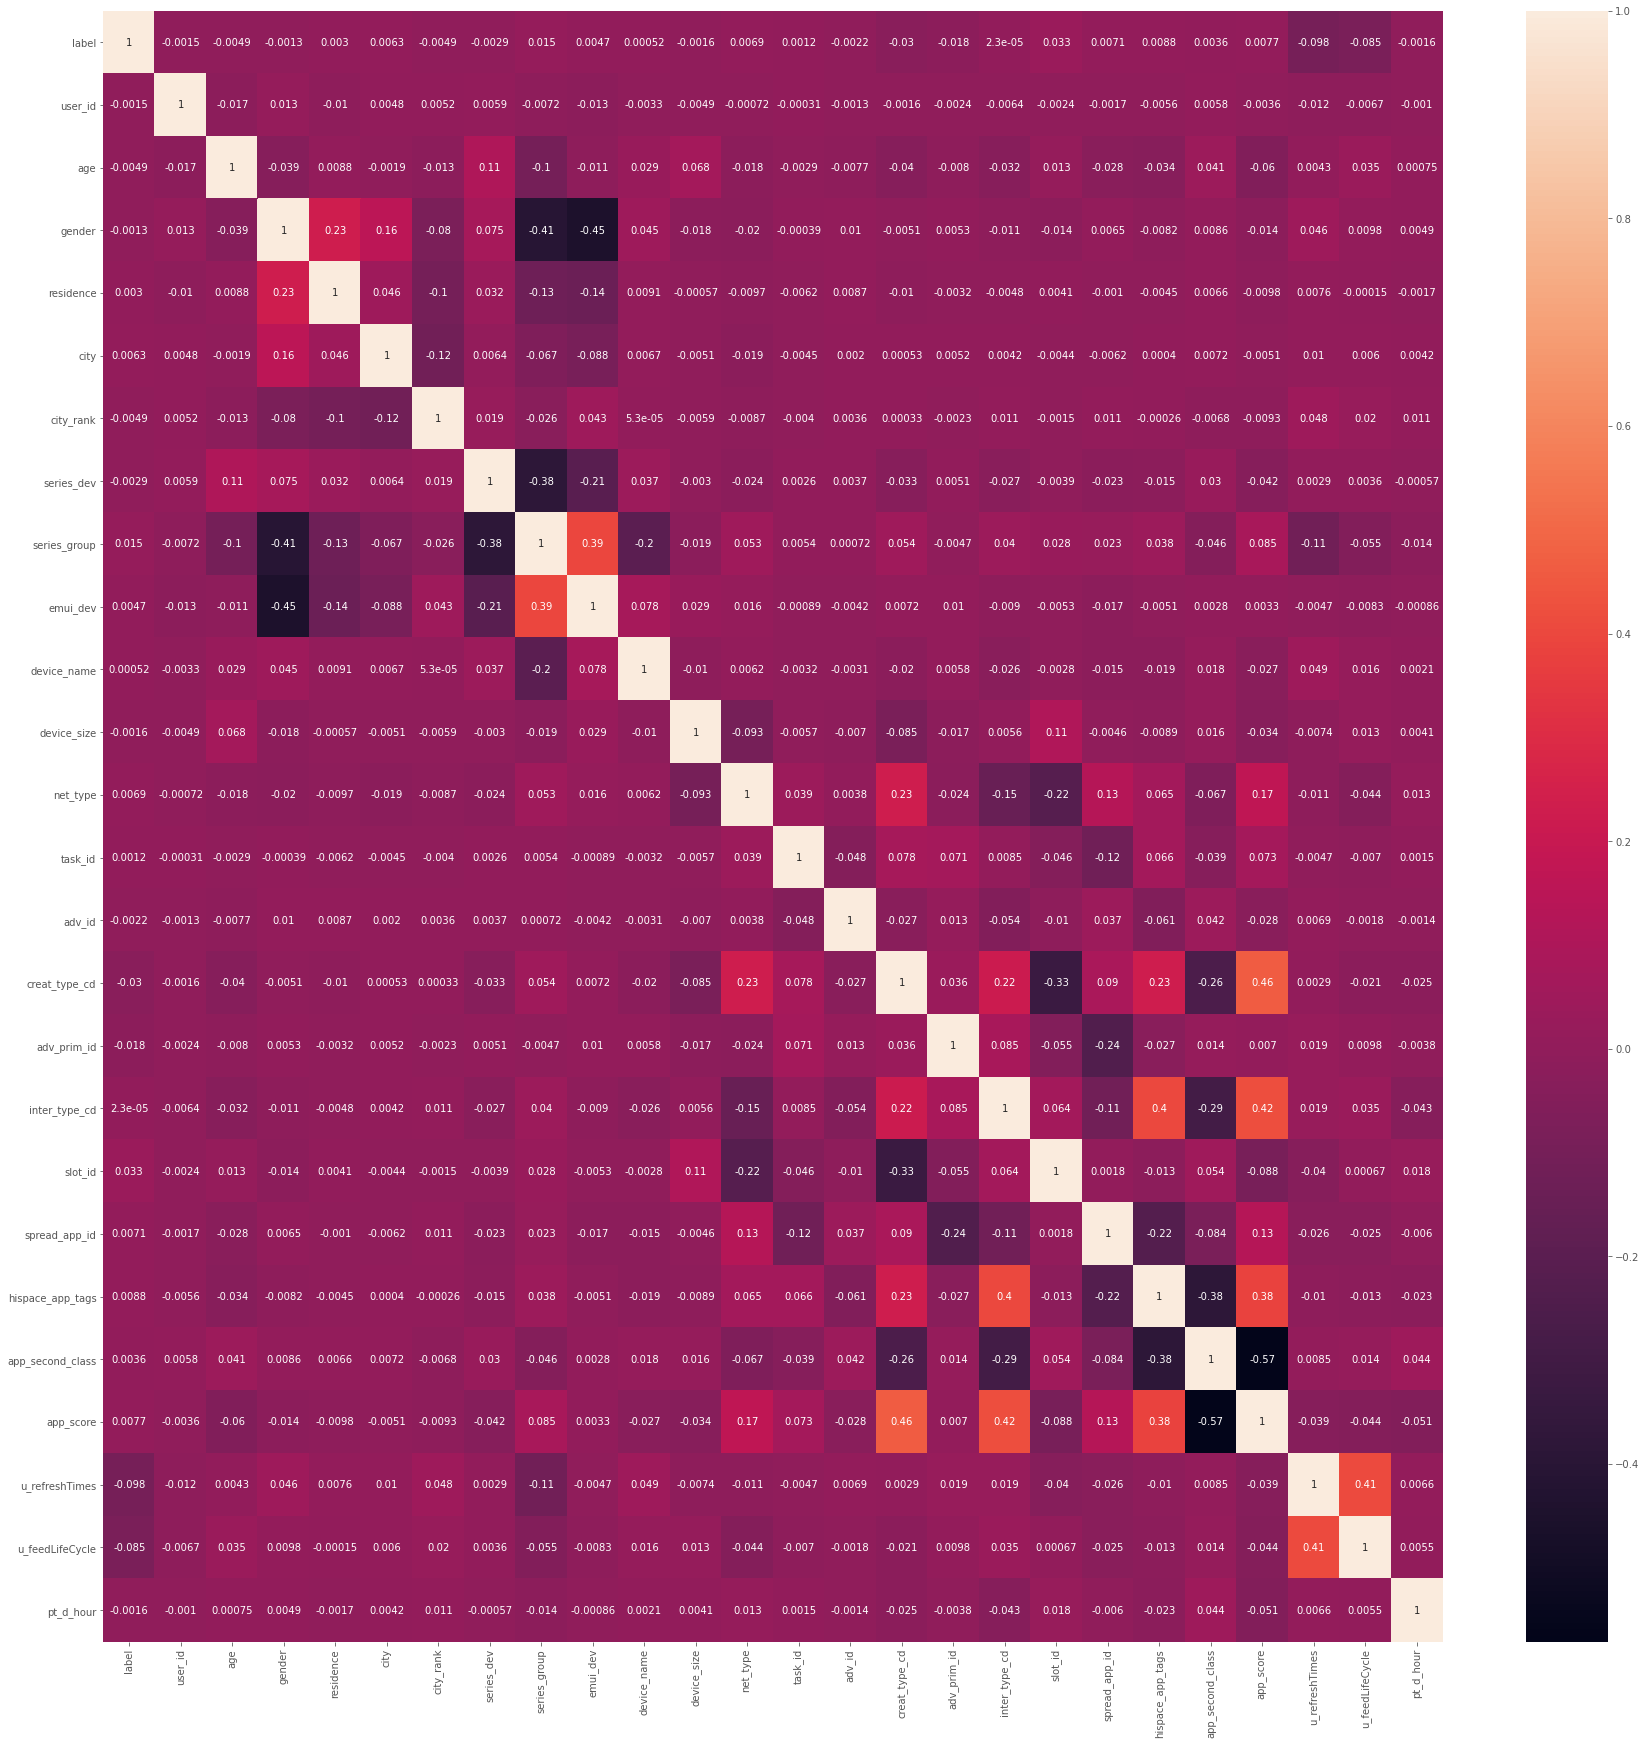

In [142]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(),annot=True);

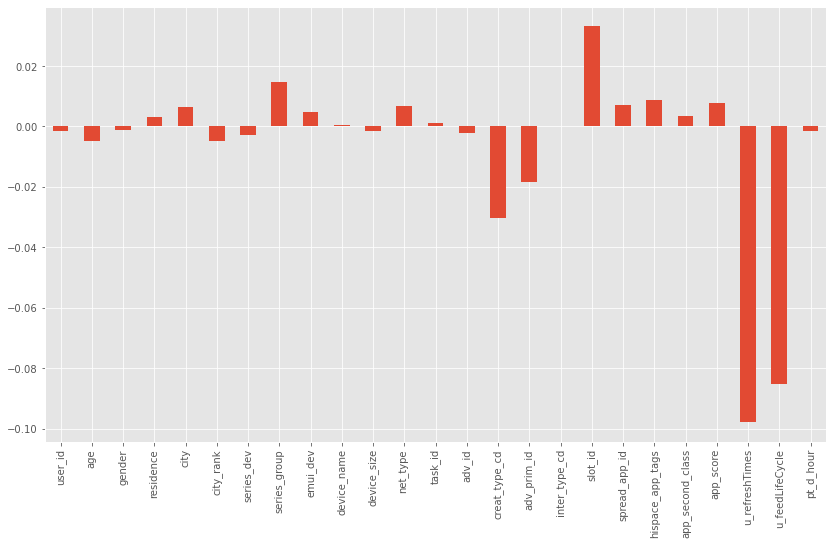

In [143]:
plt.figure(figsize=(14, 8))
corr['label'][1:].plot(kind='bar');

# AGE

at what age group, more possible to click

In [144]:
x = df[df['label'] == 1].groupby('age').count()['label']
x.apply(lambda b: b / sum(x.values) * 100)

# for those who clicked
# 3,5,7,8 are outstanding

age
2     9.302326
3    20.736434
4     1.744186
5    19.444444
6    10.917313
7    18.927649
8    16.408269
9     2.519380
Name: label, dtype: float64

In [145]:
x = df[df['label'] == 0].groupby('age').count()['label']
x.apply(lambda b: b / sum(x.values) * 100)

age
2    12.368464
3    18.990980
4     2.315849
5    11.313127
6    11.876854
7    20.073742
8    21.268232
9     1.792752
Name: label, dtype: float64

In [146]:
up = df.age[df['label']==1].value_counts().sort_index()
down = df.age.value_counts().sort_index()

up/down * 100

# some age group tend to click more
# 3,5

2    1.168736
3    1.687875
4    1.170351
5    2.631349
6    1.424718
7    1.460909
8    1.198509
9    2.161863
Name: age, dtype: float64

In [147]:
df.label.value_counts(normalize=True) *100

# 1.55% CTR

0    98.452
1     1.548
Name: label, dtype: float64

In [148]:
df.groupby(by='age').label.value_counts(normalize=True)*100

age  label
2    0        98.831264
     1         1.168736
3    0        98.312125
     1         1.687875
4    0        98.829649
     1         1.170351
5    0        97.368651
     1         2.631349
6    0        98.575282
     1         1.424718
7    0        98.539091
     1         1.460909
8    0        98.801491
     1         1.198509
9    0        97.838137
     1         2.161863
Name: label, dtype: float64

In [223]:
# make a new col of outstanding age group

conditions = [
    (df['age'].isin([3,5])),
    (df['age'].isin([7,8]) ),
    (df['age'].isin([2,4,6,9]))
    ]

# create a list of the values we want to assign for each condition
values = [1, 2, 3]

# create a new column and use np.select to assign values to it using our lists as arguments
df['age_outstanding'] = np.select(conditions, values)

# display updated DataFrame
df.age_outstanding.head()

0    2
1    2
2    2
3    1
4    2
Name: age_outstanding, dtype: int32

In [150]:
df.groupby(by='age_outstanding').label.value_counts(normalize=True)*100

age_outstanding  label
lowint           0        98.660493
                 1         1.339507
normal           0        98.673907
                 1         1.326093
outstanding      0        97.957777
                 1         2.042223
Name: label, dtype: float64

# Check the Distribucion

In [186]:
df.columns

Index(['label', 'user_id', 'age', 'gender', 'residence', 'city', 'city_rank',
       'series_dev', 'series_group', 'emui_dev', 'device_name', 'device_size',
       'net_type', 'task_id', 'adv_id', 'creat_type_cd', 'adv_prim_id',
       'inter_type_cd', 'slot_id', 'spread_app_id', 'hispace_app_tags',
       'app_second_class', 'app_score', 'ad_click_list_v001',
       'ad_click_list_v002', 'ad_click_list_v003', 'ad_close_list_v001',
       'ad_close_list_v002', 'ad_close_list_v003', 'u_newsCatInterestsST',
       'u_refreshTimes', 'u_feedLifeCycle', 'pt_d_hour', 'age_outstanding'],
      dtype='object')

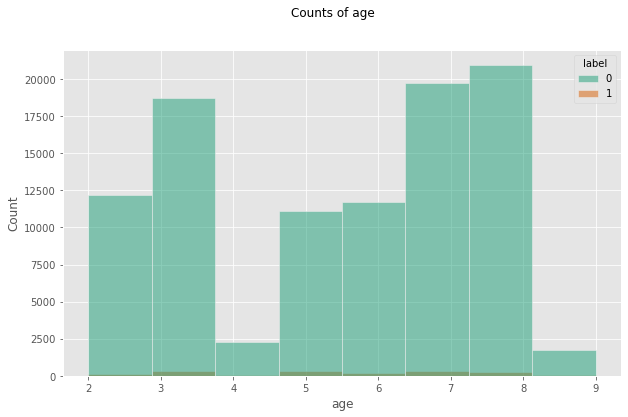

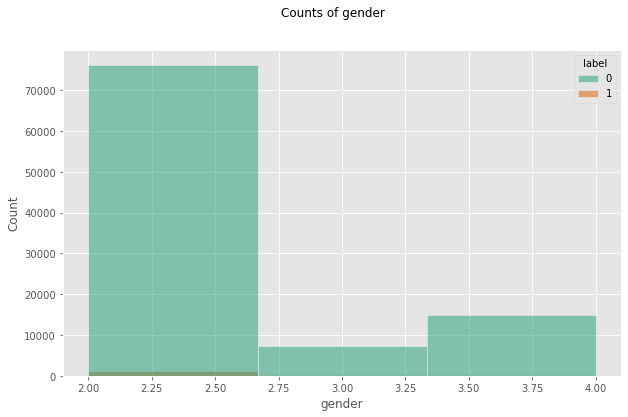

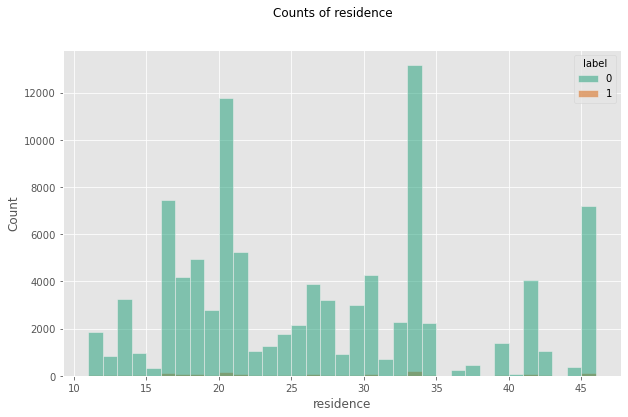

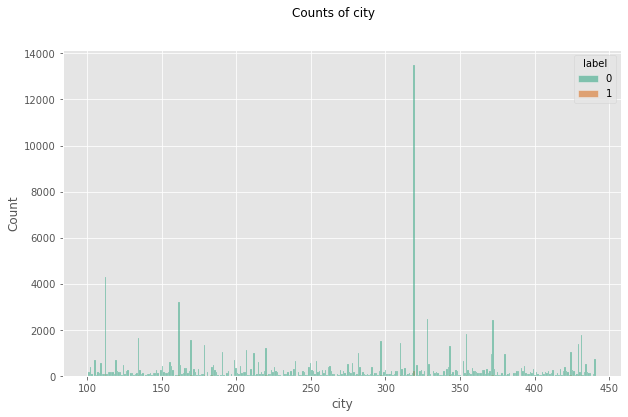

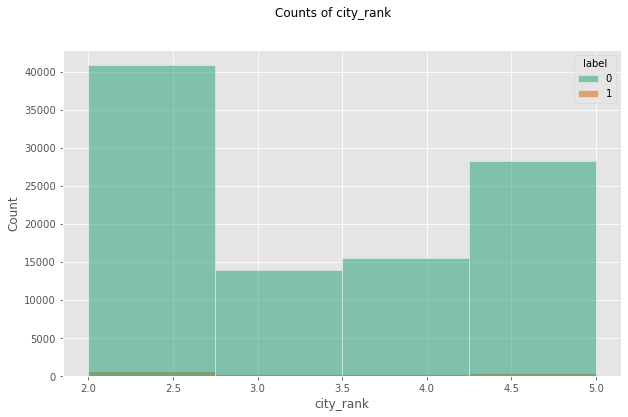

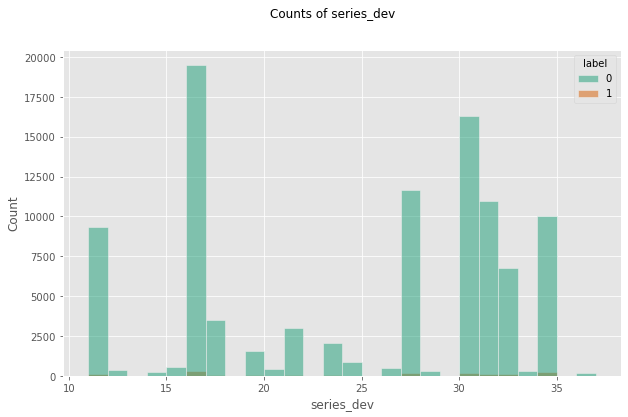

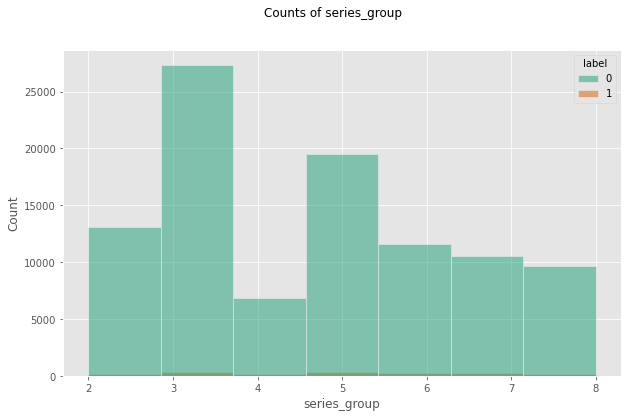

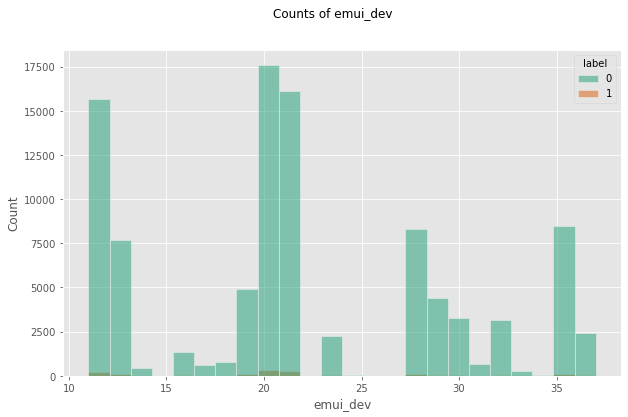

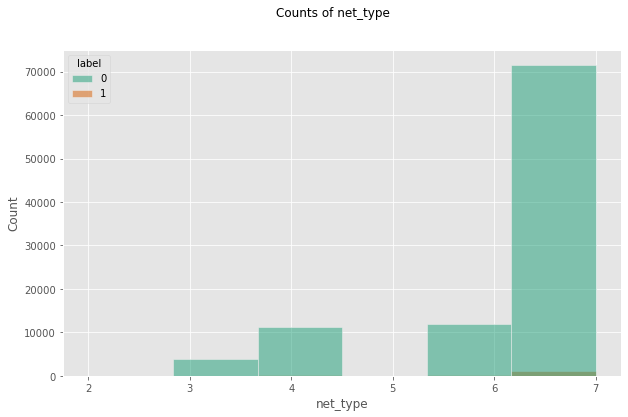

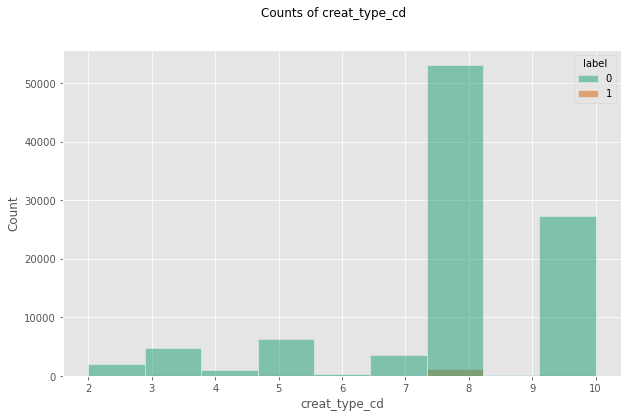

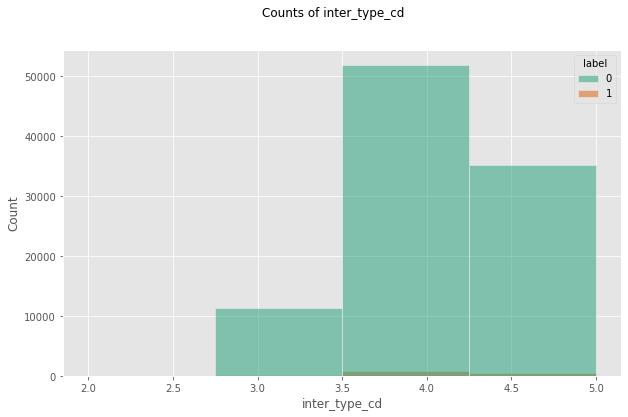

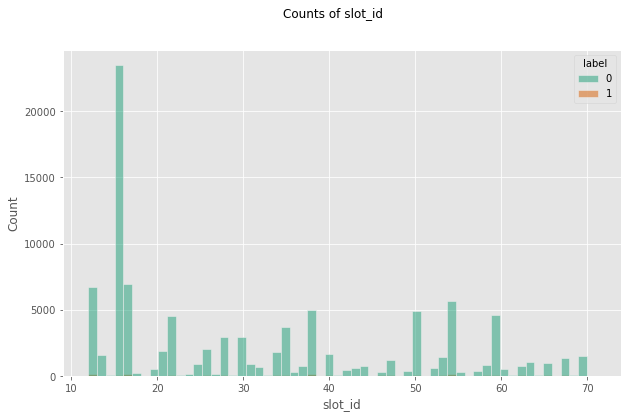

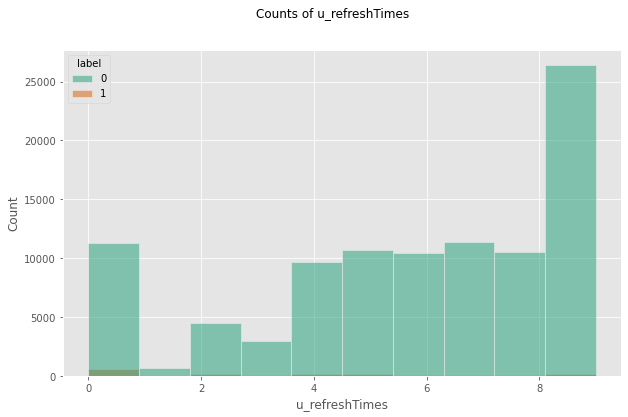

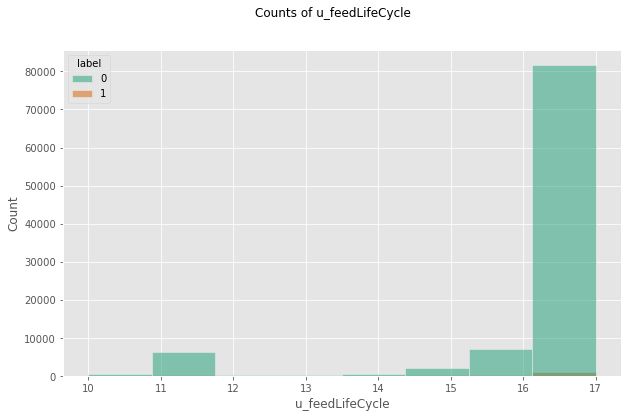

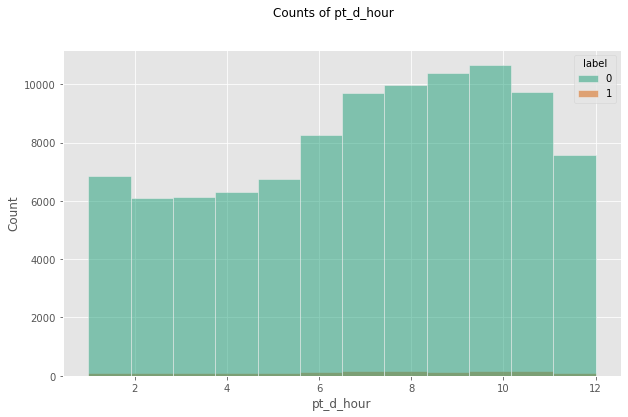

In [219]:
col_sel = ['age', 'gender', 'residence', 'city', 'city_rank',
       'series_dev', 'series_group', 'emui_dev', 
       'net_type', 'creat_type_cd', 
       'inter_type_cd', 'slot_id', 
       'u_refreshTimes', 'u_feedLifeCycle', 'pt_d_hour']



for col in col_sel:
       fig,ax = plt.subplots(figsize=(10,6))

       sns.histplot(x = df[col], hue = df['label'], palette='Dark2', bins = len(df[col].unique()), ax = ax)
       plt.suptitle(f'Counts of {col}');

# ad click list

the ad id list that user clicked 

In [273]:
col_sel = ['ad_click_list_v001', 'ad_click_list_v002', 'ad_click_list_v003',
       'ad_close_list_v001', 'ad_close_list_v002', 'ad_close_list_v003', 
       'u_newsCatInterestsST']
       
for col in col_sel:
    df[col] = df[col].map(lambda x: x.split('^'))

In [274]:
type(df.iloc[3]['ad_click_list_v003'])

list

In [62]:
df.ad_click_list_v001.unique

<bound method Series.unique of 0        [17020, 28511, 33764, 35851, 17731]
1               [28035, 20652, 17344, 34505]
2        [15334, 32486, 32508, 24212, 19633]
3        [35140, 10463, 10653, 15460, 30490]
4        [10665, 10167, 18917, 21582, 29352]
                        ...                 
19995    [23823, 33264, 29821, 18874, 24284]
19996    [29852, 21493, 16054, 36169, 30157]
19997    [22637, 21983, 27349, 34458, 11164]
19998           [29700, 28007, 18697, 17491]
19999           [34072, 31645, 31470, 12836]
Name: ad_click_list_v001, Length: 20000, dtype: object>

In [65]:
len(df['ad_click_list_v001'].explode().unique())

10002

In [46]:
len(df['ad_click_list_v001'].explode().unique())

10002

- create a col of ad list len

In [276]:
df['ad_click_list_v001_len'] = df['ad_click_list_v001'].map(lambda x: len(x))

# refreshTimes

Average number of valid news feeds updates per day.

In [152]:
df.u_refreshTimes.value_counts()

9    26573
0    11827
7    11510
5    10820
8    10645
6    10547
4     9837
2     4597
3     2998
1      646
Name: u_refreshTimes, dtype: int64

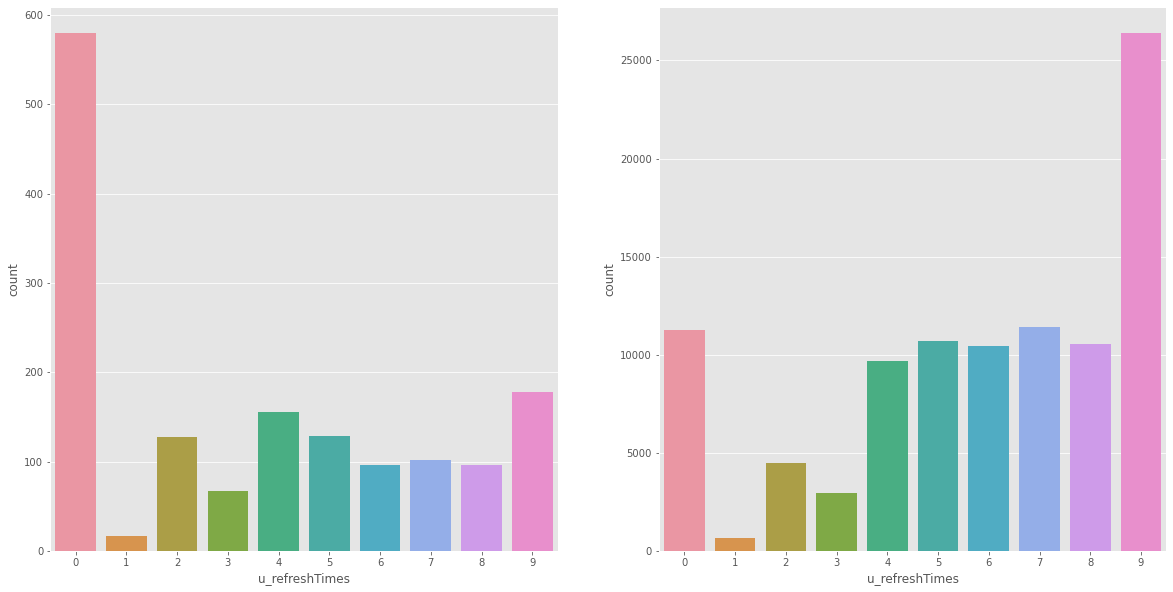

In [177]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.countplot(data=df[df['label']==1], x='u_refreshTimes', ax=axes[0])
sns.countplot(data=df[df['label']==0], x='u_refreshTimes', ax=axes[1]);

# less refresh get higher CTF
# but reality is refresh too many times

# what lead to less refresh time?

In [163]:
df.groupby(by='u_refreshTimes').label.value_counts(normalize=True)*100

# lower refresh times get higher CTR
# lower refresh times may be because of:
# device model, creative ad

u_refreshTimes  label
0               0        95.095967
                1         4.904033
1               0        97.368421
                1         2.631579
2               0        97.237329
                1         2.762671
3               0        97.765177
                1         2.234823
4               0        98.414151
                1         1.585849
5               0        98.807763
                1         1.192237
6               0        99.089789
                1         0.910211
7               0        99.113814
                1         0.886186
8               0        99.098168
                1         0.901832
9               0        99.330147
                1         0.669853
Name: label, dtype: float64

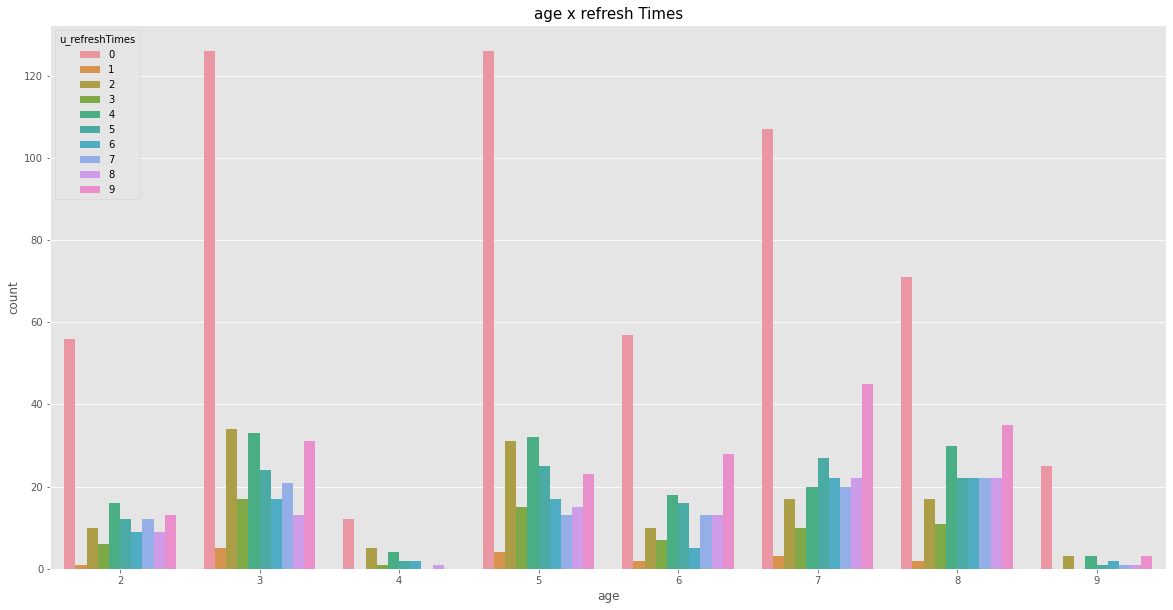

In [156]:
fig,ax = plt.subplots(figsize=(20,10))

sns.countplot(data=df[df['label']==1], x='age',hue='u_refreshTimes', ax=ax)

plt.title('age x refresh Times',fontsize=15);

# some age group has outstanding refresh times

In [176]:
df.groupby(by=['u_refreshTimes','age_outstanding']).label.value_counts(normalize=True)*100


u_refreshTimes  age_outstanding  label
0               lowint           0        95.597300
                                 1         4.402700
                normal           0        96.432151
                                 1         3.567849
                outstanding      0        92.655203
                                 1         7.344797
1               lowint           0        98.245614
                                 1         1.754386
                normal           0        97.512438
                                 1         2.487562
                outstanding      0        96.715328
                                 1         3.284672
2               lowint           0        98.059598
                                 1         1.940402
                normal           0        97.715054
                                 1         2.284946
                outstanding      0        96.098439
                                 1         3.901561
3               lowint   

# device_name', 'device_size',

<AxesSubplot:ylabel='Frequency'>

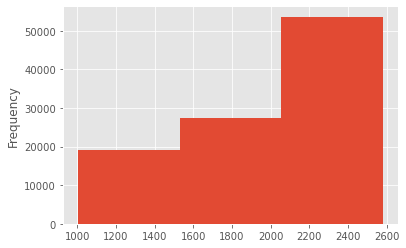

In [194]:
df['device_size'].plot(kind='hist',bins=3)

In [204]:
device_size_max = df['device_size'].max()
device_size_min = df['device_size'].min()
np.linspace(device_size_min,device_size_max,4)


array([1005.        , 1529.66666667, 2054.33333333, 2579.        ])

In [222]:
# make a new col of size of device
# 1 is bigger

conditions = [
    (df['device_size'] <= 1530),
    ((df['device_size'] >1530) & (df['device_size'] < 2054)),
    (df['device_size'] >= 2054)
    ]

# create a list of the values we want to assign for each condition
values = [3, 2, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df['device_size_cat'] = np.select(conditions, values)

# display updated DataFrame
df['device_size_cat'].head()

0    3
1    1
2    1
3    3
4    1
Name: device_size_cat, dtype: int32

# residence

In [210]:
def get_linspace(x):
    xmax = x.max()
    xmin = x.min()
    return np.linspace(xmin, xmax, 4)


In [221]:
# make a new col to divide residence by count
# 1 is more important

conditions = [
    (df['residence'] <= 2000),
    ((df['residence'] >2000) & (df['residence'] < 6000)),
    (df['residence'] >= 6000)
    ]

# create a list of the values we want to assign for each condition
values = [3, 2, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df['residence_cat'] = np.select(conditions, values)

# display updated DataFrame
df['residence_cat'].head()

0    3
1    3
2    3
3    3
4    3
Name: residence_cat, dtype: int32

# series_dev

In [225]:
df['series_dev'].value_counts()

16    19805
30    16528
27    11846
31    11122
34    10229
11     9484
32     6896
17     3565
21     3031
23     2089
19     1580
24      897
15      554
26      482
20      458
12      340
33      331
28      304
14      269
36      174
29        5
13        5
25        2
37        2
18        1
35        1
Name: series_dev, dtype: int64

In [251]:
temp = df.groupby(by='series_dev').label.value_counts(normalize=True)*100
tempdf = temp.to_frame()
tempdf

# pick 14,19,28,29,34,36 
# not good

label
series_dev label            
11         0       98.513286
           1        1.486714
12         0       98.529412
           1        1.470588
13         0      100.000000
14         0       96.282528
           1        3.717472
15         0       97.653430
           1        2.346570
16         0       98.399394
           1        1.600606
17         0       98.092567
           1        1.907433
18         0      100.000000
19         0       97.658228
           1        2.341772
20         0       98.471616
           1        1.528384
21         0       98.449357
           1        1.550643
23         0       98.228818
           1        1.771182
24         0       98.662207
           1        1.337793
25         0      100.000000
26         0       98.132780
           1        1.867220
27         0       98.581800
           1        1.418200
28         0       98.026316
           1        1.973684
29         0       80.000000
           1       20.000000
30         0       98.771781
           1        1.228219
31         0       98.840137
           1        1.159863
32         0       98.288863
           1        1.711137
33         0       98.187311
           1        1.812689
34         0       97.947013
           1        2.052987
35         0      100.000000
36         0       97.701149
           1        2.298851
37         0      100.000000

In [255]:
# make a new col of outstanding age group

conditions = [
    (df['series_dev'].isin([14,19,28,29,34,36])),
    (df['series_dev'].isin([14,19,28,29,34,36 ])==False)
    ]

# create a list of the values we want to assign for each condition
values = [1, 2]

# create a new column and use np.select to assign values to it using our lists as arguments
df['series_dev_outstanding'] = np.select(conditions, values)

# display updated DataFrame
df.age_outstanding.head()

0    2
1    2
2    2
3    1
4    2
Name: age_outstanding, dtype: int32

# combine cols

In [261]:
df.columns

Index(['label', 'user_id', 'age', 'gender', 'residence', 'city', 'city_rank',
       'series_dev', 'series_group', 'emui_dev', 'device_name', 'device_size',
       'net_type', 'task_id', 'adv_id', 'creat_type_cd', 'adv_prim_id',
       'inter_type_cd', 'slot_id', 'spread_app_id', 'hispace_app_tags',
       'app_second_class', 'app_score', 'ad_click_list_v001',
       'ad_click_list_v002', 'ad_click_list_v003', 'ad_close_list_v001',
       'ad_close_list_v002', 'ad_close_list_v003', 'u_newsCatInterestsST',
       'u_refreshTimes', 'u_feedLifeCycle', 'pt_d_hour', 'age_outstanding',
       'device_size_cat', 'residence_cat', 'series_dev_outstanding'],
      dtype='object')

In [264]:
df['age_out_dev_big'] = (df['age_outstanding']==1) & (df['device_size_cat']==3)

In [267]:
df['age_out_dev_big'] = df['age_out_dev_big'].apply(lambda x: 1 if x == True else 0)

In [268]:
df['age_out_dev_norm'] = (df['age_outstanding']==1) & (df['device_size_cat']==2)
df['age_out_dev_norm'] = df['age_out_dev_norm'].apply(lambda x: 1 if x == True else 0)

In [269]:
df['great_big_dev'] = (df['series_dev']==1) & (df['device_size_cat']==3)
df['great_big_dev'] = df['great_big_dev'].apply(lambda x: 1 if x == True else 0)

In [270]:
df['great_nom_dev'] = (df['series_dev']==1) & (df['device_size_cat']==2)
df['great_nom_dev'] = df['great_nom_dev'].apply(lambda x: 1 if x == True else 0)

# time to CSV

In [278]:
# final check for export

df.shape

(100000, 42)

In [279]:
df.columns

Index(['label', 'user_id', 'age', 'gender', 'residence', 'city', 'city_rank',
       'series_dev', 'series_group', 'emui_dev', 'device_name', 'device_size',
       'net_type', 'task_id', 'adv_id', 'creat_type_cd', 'adv_prim_id',
       'inter_type_cd', 'slot_id', 'spread_app_id', 'hispace_app_tags',
       'app_second_class', 'app_score', 'ad_click_list_v001',
       'ad_click_list_v002', 'ad_click_list_v003', 'ad_close_list_v001',
       'ad_close_list_v002', 'ad_close_list_v003', 'u_newsCatInterestsST',
       'u_refreshTimes', 'u_feedLifeCycle', 'pt_d_hour', 'age_outstanding',
       'device_size_cat', 'residence_cat', 'series_dev_outstanding',
       'age_out_dev_big', 'age_out_dev_norm', 'great_big_dev', 'great_nom_dev',
       'ad_click_list_v001_len'],
      dtype='object')

In [281]:
col_sel = ['ad_click_list_v001', 'ad_click_list_v002', 'ad_click_list_v003', 'ad_close_list_v001',
       'ad_close_list_v002', 'ad_close_list_v003', 'u_newsCatInterestsST']

df_export = df.drop(columns=col_sel)

In [282]:
df_export.to_csv(r'C:\Users\qwswe\Documents\Flatiron\DS_P3\Output_Data\data_subset_engineered_for_model.csv', index = False)